In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb
import numpy as np

In [2]:
def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(10,6)):
    titledict = {'fontweight':'bold', 'fontsize': 15}
    labeldict = {'fontsize': 13}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    plt.show()

In [3]:
# lista de todos os arquivos
caged_files = sorted(glob('CAGEDMOV202101/CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [4]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['CAGEDMOV202101\\CAGEDMOV202101.txt',
 'CAGEDMOV202101\\CAGEDMOV202102.txt',
 'CAGEDMOV202101\\CAGEDMOV202103.txt']

In [5]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [7]:
#Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária

In [6]:
main_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
9044057,202103,3,35,355030,A,151201,1,724315,102,7,...,2,3,10,0,0,0,1500.000000,99,0,1
9044058,202103,3,35,355030,I,5620101,1,513205,111,7,...,0,1,20,0,1,0,6567.000000,7,0,1
9044059,202103,2,25,251370,C,1532700,-1,764105,101,7,...,0,1,31,0,0,0,1122.000000,10,0,1
9044060,202103,3,33,330455,I,5510801,-1,513505,101,6,...,0,1,31,0,0,0,1021.419983,5,0,1
9044061,202103,3,35,354980,G,4530701,-1,142105,101,9,...,0,1,31,0,0,0,4500.000000,4,0,1


In [52]:
main_df['Sexo']= main_df['sexo'].map({
1:'Masculino',
3:'Feminino',
9:'Nao Identificado'})
main_df['Raça'] = main_df['raçacor'].map({
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indigena',
6:'Nao Informada',
9:'Nao Identificado'})
main_df['Tipo de movimentação'] = main_df['tipomovimentação'].map({
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'})

In [53]:
conditions = [
    (main_df['tipomovimentação'].isin([10,20,25,35,70])),
    (main_df['tipomovimentação'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (main_df['tipomovimentação'].isin([99]))
    ]

values = ['Admitido', 'Desligado', 'Não identificado']

main_df['movimento'] = np.select(conditions, values)

In [54]:
desligamento_df = main_df[main_df['movimento']=='Desligado']

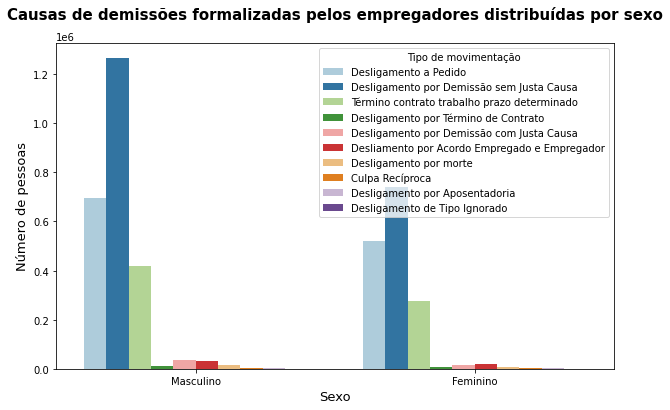

In [48]:
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='Sexo',data = desligamento_df, palette='Paired'),
    title="Causas de demissões formalizadas pelos empregadores distribuídas por sexo",
    xlabel="Sexo",
    ylabel="Número de pessoas",
)

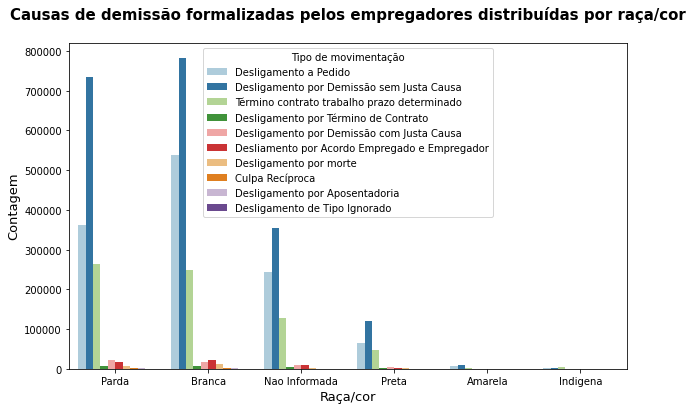

In [55]:
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='Raça',data = desligamento_df, palette='Paired'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por raça/cor",
    xlabel="Raça/cor",
    ylabel="Número de pessoas"
)

In [56]:
conditions = [
    ((main_df['idade'] >= 0) & (main_df['idade'] <= 19)),
    ((main_df['idade'] >= 20) & (main_df['idade'] <= 59)),
    (main_df['idade'] >= 60)
    ]

values = ['Jovem', 'Adulto', 'Idoso']

main_df['faixa_etaria'] = np.select(conditions, values)

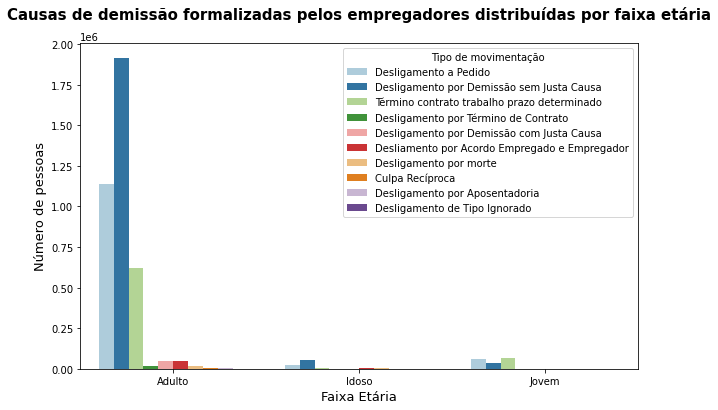

In [57]:
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='faixa_etaria',data = desligamento_df, palette='Paired'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por faixa etária",
    xlabel="Faixa Etária",
    ylabel="Número de pessoas",
)